# Parts of Speech
Do female speakers really tend to use more adjectives/adverbs (flowery language)? How many commands do they use.

For this analysis, I use the [PennTreebank POS Tagger](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). It marks both verb base forms (for commands) and modals (for forms like "must, could, should").

In [117]:
import pandas as pd
import nltk

In [118]:
movie_df = pd.read_pickle(r"C:/Users/cassi/Desktop/Data_Science/Animated-Movie-Gendered-Dialogue/private/all_movies_toktype.pkl")

In [119]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14096 entries, 0 to 14095
Data columns (total 14 columns):
Disney_Period       14096 non-null object
Gender              14096 non-null object
Movie               14096 non-null object
Role                14096 non-null object
Song                14096 non-null object
Speaker             14096 non-null object
Speaker_Status      14096 non-null object
Text                14096 non-null object
UTTERANCE_NUMBER    14096 non-null int64
Year                14096 non-null int64
Tokens              14096 non-null object
Types               14096 non-null object
Token_Count         14096 non-null int64
Type_Count          14096 non-null int64
dtypes: int64(4), object(10)
memory usage: 991.2+ KB


In [120]:
movie_df = movie_df[(movie_df.Song == 'D') & (movie_df.Token_Count != 0)]

In [121]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13442 entries, 0 to 14095
Data columns (total 14 columns):
Disney_Period       13442 non-null object
Gender              13442 non-null object
Movie               13442 non-null object
Role                13442 non-null object
Song                13442 non-null object
Speaker             13442 non-null object
Speaker_Status      13442 non-null object
Text                13442 non-null object
UTTERANCE_NUMBER    13442 non-null int64
Year                13442 non-null int64
Tokens              13442 non-null object
Types               13442 non-null object
Token_Count         13442 non-null int64
Type_Count          13442 non-null int64
dtypes: int64(4), object(10)
memory usage: 1.0+ MB


In [122]:
movie_df['POS'] = movie_df["Tokens"].map(nltk.pos_tag)

In [123]:
movie_df.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count,POS
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th...","{., !, slave, thy, face, from, me, the, and, c...",26,24,"[(slave, NN), (in, IN), (the, DT), (magic, JJ)..."
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]","{,, what, thou, queen, ?, wouldst, know, my}",8,8,"[(what, WP), (wouldst, VBZ), (thou, NN), (know..."
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the...","{,, the, all, is, mirror, fairest, ?, on, one,...",14,13,"[(magic, JJ), (mirror, NN), (on, IN), (the, DT..."
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h...","{., lovely, famed, maid, thy, her, than, ,, is...",33,27,"[(famed, VBN), (is, VBZ), (thy, JJ), (beauty, ..."
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]","{., name, !, alas, for, reveal, her}",8,7,"[(alas, NN), (for, IN), (her, PRP$), (!, .), (..."


In [10]:
pos_dict = {}
for pos in movie_df['POS'].iloc[0]:
    if pos[1] in pos_dict:
        pos_dict[pos[1]] += 1
    else:
        pos_dict[pos[1]] = 1

In [11]:
pos_dict

{'NN': 9,
 'IN': 3,
 'DT': 2,
 'JJ': 2,
 'VBN': 1,
 'JJS': 1,
 'CC': 1,
 'VBP': 1,
 '.': 3,
 'VB': 2,
 'PRP': 1}

In [12]:
tag_fd = nltk.FreqDist(tag for (word, tag) in movie_df['POS'].iloc[0])

In [16]:
tag_fd.most_common()

[('NN', 9),
 ('IN', 3),
 ('.', 3),
 ('DT', 2),
 ('JJ', 2),
 ('VB', 2),
 ('VBN', 1),
 ('JJS', 1),
 ('CC', 1),
 ('VBP', 1),
 ('PRP', 1)]

In [124]:
movie_df['Tag_Freq'] = movie_df['POS'].map(lambda x: nltk.FreqDist(tag for (word, tag) in x))

In [60]:
'VBN' in movie_df['Tag_Freq'].iloc[0]

True

In [61]:
movie_df['Tag_Freq'].iloc[0]['VBN']

1

In [62]:
movie_df['Command_Count'] = movie_df['Tag_Freq'].map(lambda x: x['VB'])

In [125]:
movie_df.head()

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count,POS,Tag_Freq
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th...","{., !, slave, thy, face, from, me, the, and, c...",26,24,"[(slave, NN), (in, IN), (the, DT), (magic, JJ)...","{'NN': 9, 'IN': 3, 'DT': 2, 'JJ': 2, 'VBN': 1,..."
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]","{,, what, thou, queen, ?, wouldst, know, my}",8,8,"[(what, WP), (wouldst, VBZ), (thou, NN), (know...","{'WP': 1, 'VBZ': 1, 'NN': 3, ',': 1, 'PRP$': 1..."
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the...","{,, the, all, is, mirror, fairest, ?, on, one,...",14,13,"[(magic, JJ), (mirror, NN), (on, IN), (the, DT...","{'JJ': 1, 'NN': 2, 'IN': 2, 'DT': 3, ',': 1, '..."
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h...","{., lovely, famed, maid, thy, her, than, ,, is...",33,27,"[(famed, VBN), (is, VBZ), (thy, JJ), (beauty, ...","{'VBN': 1, 'VBZ': 2, 'JJ': 3, 'NN': 7, ',': 3,..."
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]","{., name, !, alas, for, reveal, her}",8,7,"[(alas, NN), (for, IN), (her, PRP$), (!, .), (...","{'NN': 3, 'IN': 1, 'PRP$': 2, '.': 2}"


In [126]:
movie_df.to_pickle(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\private\all_tagged_dialogue.pkl")

In [64]:
movie_df['POS'].iloc[0] #not all that accurate

[('slave', 'NN'), ('in', 'IN'), ('the', 'DT'), ('magic', 'JJ'), ('mirror', 'NN'), ('come', 'VBN'), ('from', 'IN'), ('the', 'DT'), ('farthest', 'JJS'), ('space', 'NN'), ('through', 'IN'), ('wind', 'NN'), ('and', 'CC'), ('darkness', 'NN'), ('i', 'NN'), ('summon', 'VBP'), ('thee', 'NN'), ('.', '.'), ('speak', 'NN'), ('!', '.'), ('let', 'VB'), ('me', 'PRP'), ('see', 'VB'), ('thy', 'JJ'), ('face', 'NN'), ('.', '.')]

In [66]:
%pprint

Pretty printing has been turned OFF


In [75]:
movie_df['Modal_Count'] = movie_df['Tag_Freq'].map(lambda x: x['MD'])

In [71]:
movie_df.reset_index(drop=True, inplace=True)

In [72]:
movie_df[movie_df.Modal_Count > 1]

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count,POS,Tag_Freq,Command_Count,Modal_Count
18,EARLY,f,Snow White,PRO,D,snow white,PRINCESS,hello there. what's the matter ? where's your ...,22,1937,"[hello, there, ., what, 's, the, matter, ?, wh...","{'re, ., !, cry, are, they, ?, matter, you, 's...",69,44,"[(hello, NN), (there, RB), (., .), (what, WP),...","{'NN': 9, 'RB': 5, '.': 14, 'WP': 1, 'VBZ': 3,...",7,3
19,EARLY,m,Snow White,ANT,D,guard,NON-P,i can't ! i can't do it ! forgive me. i beg of...,23,1937,"[i, ca, n't, !, i, ca, n't, do, it, !, forgive...","{me, forgive, ., ,, your, !, highness, ca, n't...",22,14,"[(i, NN), (ca, MD), (n't, RB), (!, .), (i, VB)...","{'NN': 3, 'MD': 2, 'RB': 2, '.': 4, 'VB': 2, '...",2,2
28,EARLY,f,Snow White,PRO,D,snow white,PRINCESS,i can't sleep in the ground like you. or in a ...,36,1937,"[i, ca, n't, sleep, in, the, ground, like, you...","{., or, would, stay, ?, you, big, me, the, gro...",46,35,"[(i, NN), (ca, MD), (n't, RB), (sleep, VB), (i...","{'NN': 5, 'MD': 3, 'RB': 5, 'VB': 3, 'IN': 5, ...",3,3
31,EARLY,f,Snow White,PRO,D,snow white,PRINCESS,hello ? may i come in ? shh. oh! what a cute l...,39,1937,"[hello, ?, may, i, come, in, ?, shh, ., oh, !,...","{., !, little, may, too, ?, stocking, 's, from...",51,35,"[(hello, NNS), (?, .), (may, MD), (i, VB), (co...","{'NNS': 4, '.': 10, 'MD': 2, 'VB': 3, 'IN': 3,...",3,2
34,EARLY,f,Snow White,PRO,D,snow white,PRINCESS,"and just look at that broom. tsk, tsk, tsk ! t...",42,1937,"[and, just, look, at, that, broom, ., tsk, ,, ...","{., would, !, tsk, they, 'd, you, why, ,, moth...",34,23,"[(and, CC), (just, RB), (look, VB), (at, IN), ...","{'CC': 1, 'RB': 2, 'VB': 2, 'IN': 1, 'DT': 2, ...",2,2
35,EARLY,f,Snow White,PRO,D,snow white,PRINCESS,"maybe they have no mother. then, they're orpha...",43,1937,"[maybe, they, have, no, mother, ., then, ,, th...","{house, ., 're, stay, we, orphans, they, too, ...",38,27,"[(maybe, RB), (they, PRP), (have, VBP), (no, D...","{'RB': 5, 'PRP': 6, 'VBP': 3, 'DT': 3, 'NN': 3...",4,2
64,EARLY,m,Snow White,HELPER,D,sneezy,NON-P,don't do it. take them away. my nose ! my hay ...,87,1937,"[do, n't, do, it, ., take, them, away, ., my, ...","{., away, !, stand, oh, fever, ca, n't, hay, n...",30,18,"[(do, VBP), (n't, RB), (do, VB), (it, PRP), (....","{'VBP': 2, 'RB': 4, 'VB': 5, 'PRP': 4, '.': 6,...",5,2
67,EARLY,m,Snow White,HELPER,D,sneezy,NON-P,i couldn't help it. i can't tell. when you got...,90,1937,"[i, could, n't, help, it, ., i, ca, n't, tell,...","{help, ., tell, ,, could, ca, when, n't, iii, ...",30,19,"[(i, NN), (could, MD), (n't, RB), (help, VB), ...","{'NN': 5, 'MD': 2, 'RB': 5, 'VB': 3, 'PRP': 3,...",3,2
70,EARLY,m,Snow White,HELPER,D,various dwarfs,NON-P,don't let go. hold him tight. i'll tie it. mak...,93,1937,"[do, n't, let, go, ., hold, him, tight, ., i, ...","{make, ., ,, knot, hold, that, n't, there, tie...",26,19,"[(do, VBP), (n't, RB), (let, VB), (go, VB), (....","{'VBP': 1, 'RB': 2, 'VB': 6, '.': 5, 'PRP': 3,...",6,2
147,EARLY,m,Snow White,HELPER,D,grumpy,NON-P,"she don't, huh ? she knows everything. she's f...",170,1937,"[she, do, n't, ,, huh, ?, she, knows, everythi...","{., knows, !, right, ?, 's, pfft, now, herself...",34,28,"[(she, PRP), (do, VBP), (n't, RB), (,, ,), (hu...","{'PRP': 4, 'VBP': 1, 'RB': 4, ',': 1, 'VB': 3,...",3,2


In [73]:
movie_df['POS'].iloc[18] #not a command....

[('hello', 'NN'), ('there', 'RB'), ('.', '.'), ('what', 'WP'), ("'s", 'VBZ'), ('the', 'DT'), ('matter', 'NN'), ('?', '.'), ('where', 'WRB'), ("'s", 'VBZ'), ('your', 'PRP$'), ('mama', 'NN'), ('and', 'CC'), ('papa', 'NN'), ('?', '.'), ('why', 'WRB'), (',', ','), ('i', 'NN'), ('believe', 'VBP'), ('you', 'PRP'), ("'re", 'VBP'), ('lost', 'VBN'), ('.', '.'), ('oh', 'UH'), (',', ','), ('please', 'VB'), (',', ','), ('do', 'VBP'), ("n't", 'RB'), ('cry', 'VB'), ('.', '.'), ('come', 'VB'), ('on', 'IN'), ('.', '.'), ('perk', 'VB'), ('up', 'RP'), ('.', '.'), ('wo', 'MD'), ("n't", 'RB'), ('you', 'PRP'), ('smile', 'VB'), ('for', 'IN'), ('me', 'PRP'), ('?', '.'), ('that', 'DT'), ("'s", 'VBZ'), ('better', 'JJR'), ('.', '.'), ('your', 'PRP$'), ('mama', 'NN'), ('and', 'CC'), ('papa', 'NN'), ('ca', 'MD'), ("n't", 'RB'), ('be', 'VB'), ('far', 'RB'), ('.', '.'), ('there', 'EX'), ('they', 'PRP'), ('are', 'VBP'), ('.', '.'), ('can', 'MD'), ('you', 'PRP'), ('fly', 'VB'), ('?', '.'), ('goodbye', 'NN'), ('.', '.

In [46]:
movie_df.groupby('Gender')['Command_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,4437.0,0.815867,1.750471,0.0,0.0,0.0,1.0,53.0
m,9221.0,0.773777,1.343745,0.0,0.0,0.0,1.0,29.0
n,438.0,0.687215,1.692728,0.0,0.0,0.0,1.0,25.0


In [50]:
movie_df[movie_df.Command_Count == 53].POS #lol, it's let it go

6835    [(the, DT), (snow, JJ), (glows, VBZ), (white, ...
Name: POS, dtype: object

In [51]:
movie_df.POS.iloc[6835]

[('the', 'DT'), ('snow', 'JJ'), ('glows', 'VBZ'), ('white', 'JJ'), ('on', 'IN'), ('the', 'DT'), ('mountain', 'NN'), ('tonight', 'NN'), (',', ','), ('not', 'RB'), ('a', 'DT'), ('footprint', 'NN'), ('to', 'TO'), ('be', 'VB'), ('seen', 'VBN'), ('.', '.'), ('a', 'DT'), ('kingdom', 'NN'), ('of', 'IN'), ('isolation', 'NN'), (',', ','), ('and', 'CC'), ('it', 'PRP'), ('looks', 'VBZ'), ('like', 'IN'), ('i', 'NN'), ("'m", 'VBP'), ('the', 'DT'), ('queen', 'NN'), ('.', '.'), ('the', 'DT'), ('wind', 'NN'), ('is', 'VBZ'), ('howling', 'VBG'), ('like', 'IN'), ('this', 'DT'), ('swirling', 'VBG'), ('storm', 'NN'), ('inside', 'NN'), ('.', '.'), ('could', 'MD'), ("n't", 'RB'), ('keep', 'VB'), ('it', 'PRP'), ('in', 'IN'), (',', ','), ('heaven', 'JJ'), ('knows', 'NNS'), ('i', 'VBP'), ('tried', 'VBN'), ('.', '.'), ('do', 'VBP'), ("n't", 'RB'), ('let', 'VB'), ('them', 'PRP'), ('in', 'IN'), (',', ','), ('do', 'VBP'), ("n't", 'RB'), ('let', 'VB'), ('them', 'PRP'), ('see', 'VB'), (',', ','), ('be', 'VB'), ('the'

Questions:
* How to get rid of "to VB" forms?
* How to get modals that only address another speaker (ie "you should" instead of "I should")?

In [ ]:
#try the stanford tagger instead


In [76]:
movie_df['Adj_Count'] = movie_df['Tag_Freq'].map(lambda x: x['JJ']+x['JJR']+x['JJS'])

In [77]:
movie_df['Adv_Count'] = movie_df['Tag_Freq'].map(lambda x: x['RB']+x['RBR']+x['RBS'])

In [83]:
adj_by_gen = movie_df.groupby('Gender')['Adj_Count'].describe()['mean']

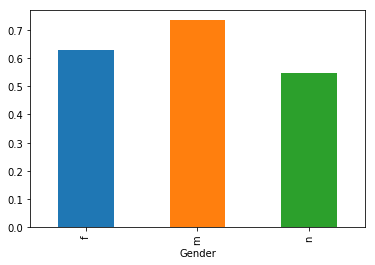

In [87]:
adj_by_gen.plot.bar()

In [88]:
adv_by_gen = movie_df.groupby('Gender')['Adv_Count'].describe()['mean']

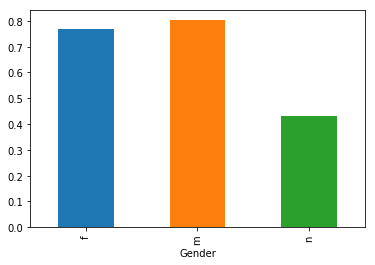

In [89]:
adv_by_gen.plot.bar()

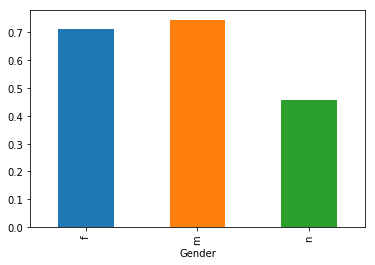

In [90]:
command_by_gen = movie_df.groupby('Gender')['Command_Count'].describe()['mean']
command_by_gen.plot.bar()

In [91]:
modal_by_gen = movie_df.groupby('Gender')['Modal_Count'].describe()['mean']

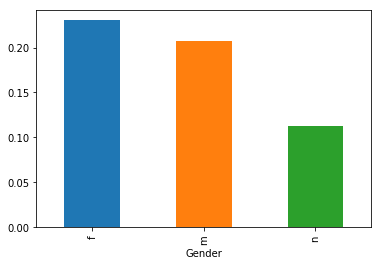

In [92]:
modal_by_gen.plot.bar() #females are using more modals...

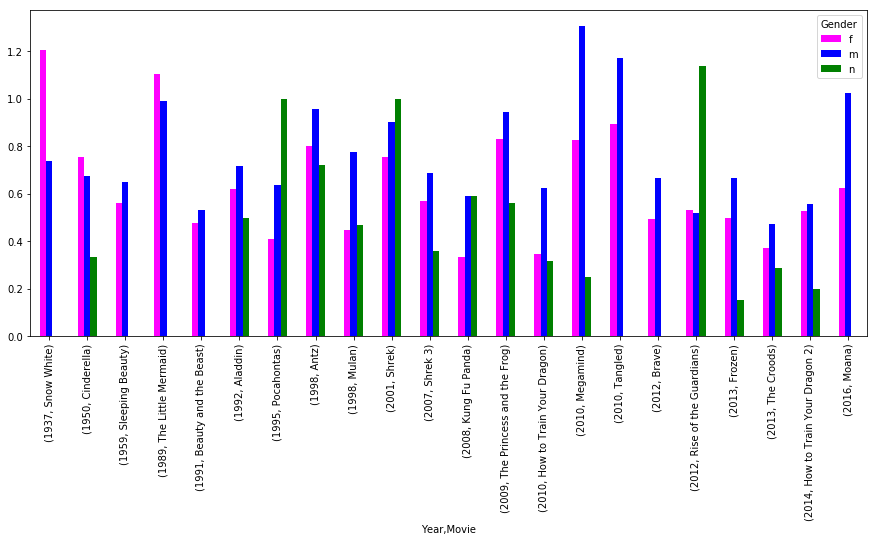

In [94]:
#let's take a look by movie....
adj_by_gen_all = movie_df.groupby(['Year','Movie','Gender'])["Adj_Count"].describe()['mean']
adj_by_gen_all.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

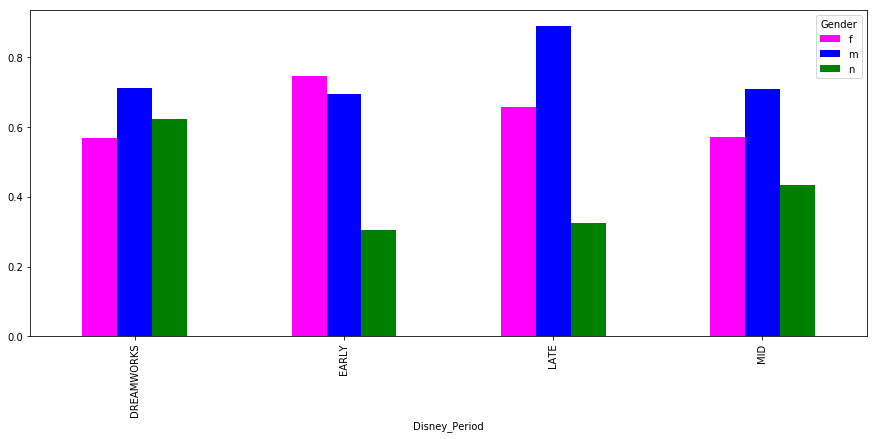

In [95]:
adj_by_gen_all = movie_df.groupby(['Disney_Period','Gender'])["Adj_Count"].describe()['mean']
adj_by_gen_all.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

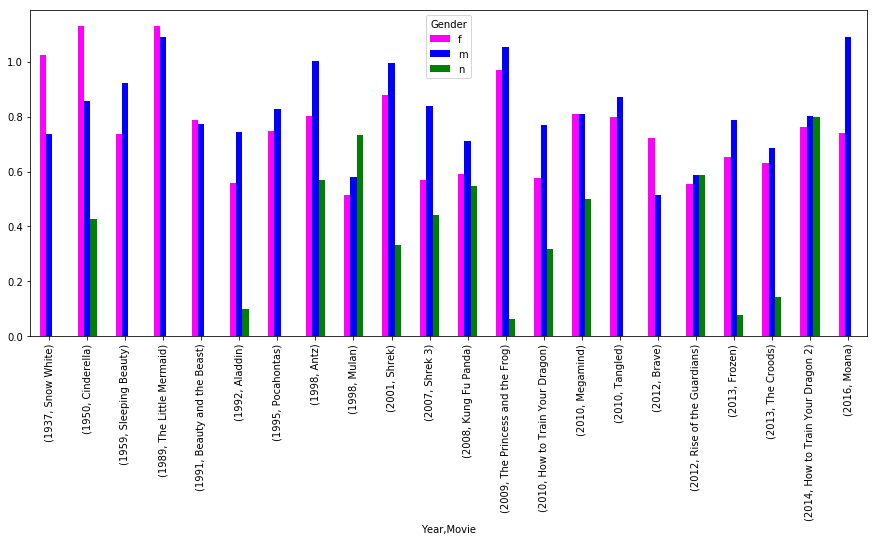

In [96]:
adv_by_gen_all = movie_df.groupby(['Year','Movie','Gender'])["Adv_Count"].describe()['mean']
adv_by_gen_all.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

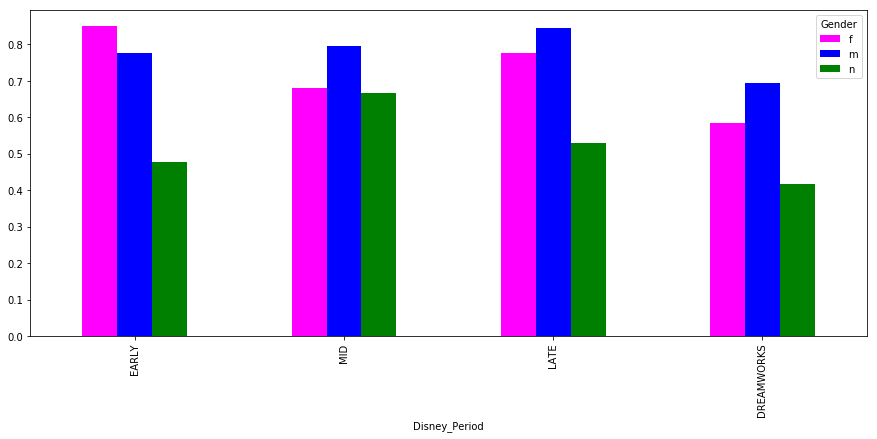

In [104]:
adv_by_gen_all = movie_df.groupby(['Disney_Period','Gender'], sort=False)["Command_Count"].describe()['mean']
adv_by_gen_all.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

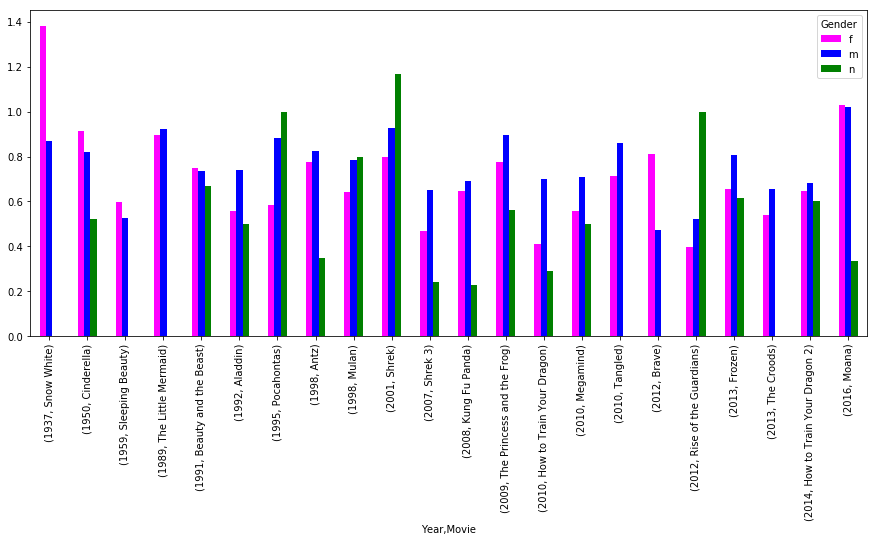

In [98]:
command_by_gen_all = movie_df.groupby(['Year','Movie','Gender'])["Command_Count"].describe()['mean']
command_by_gen_all.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

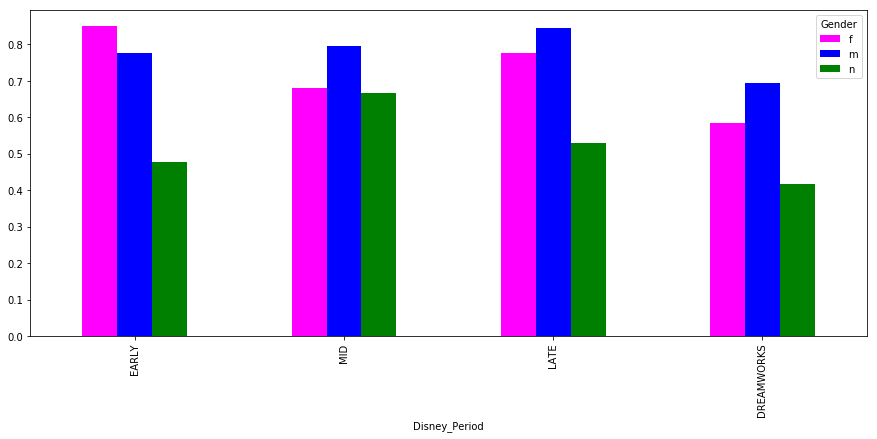

In [103]:
command_by_gen_all = movie_df.groupby(['Disney_Period','Gender'], sort=False)["Command_Count"].describe()['mean']
command_by_gen_all.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

In [ ]:
#by role, too....
roles_by_gender = all_dialogue_by_gender_role.groupby(['Role']).Gender.value_counts(normalize=True)
roles_by_gender.unstack(level=1).plot.barh(figsize=(8,6), stacked=True, title="Speaker Role by Gender: All Movies",
                                           colors=['magenta','blue'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

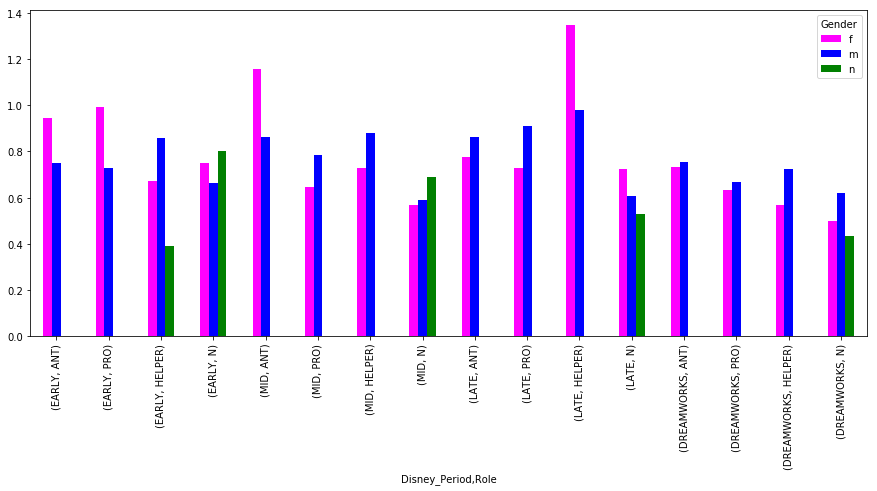

In [116]:
command_by_gen_all = movie_df.groupby(['Disney_Period','Role','Gender'], sort=False)["Command_Count"].describe()['mean']
command_by_gen_all.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

In [ ]:
I really feel like these results are being skewed by the number of lines a character has.... or how long they are...

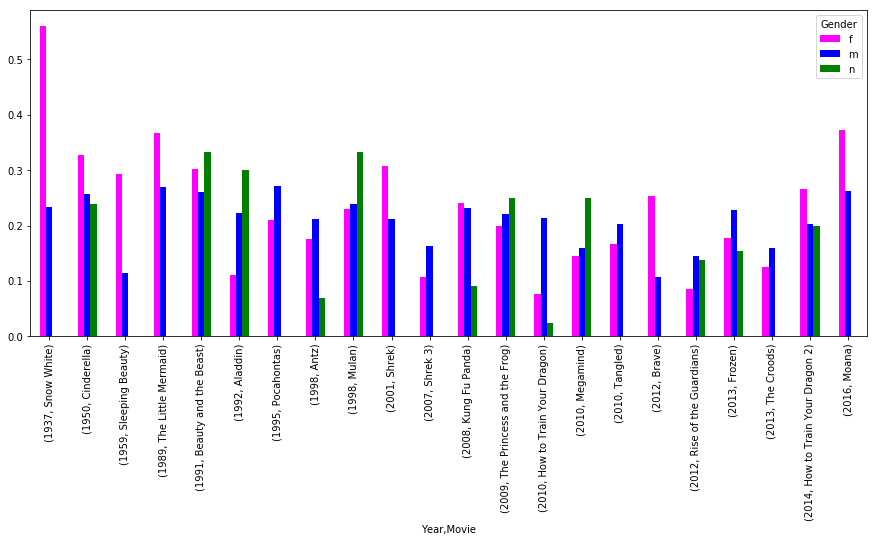

In [100]:
modal_by_gen_all = movie_df.groupby(['Year','Movie','Gender'])["Modal_Count"].describe()['mean']
modal_by_gen_all.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

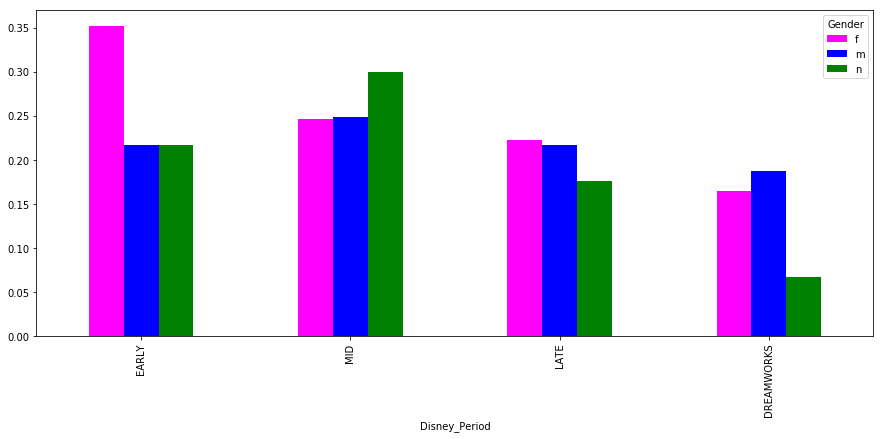

In [102]:
modal_by_gen_all = movie_df.groupby(['Disney_Period','Gender'], sort=False)["Modal_Count"].describe()['mean']
modal_by_gen_all.unstack().plot.bar(color = ['magenta', 'blue', 'green'], figsize = (15,6))

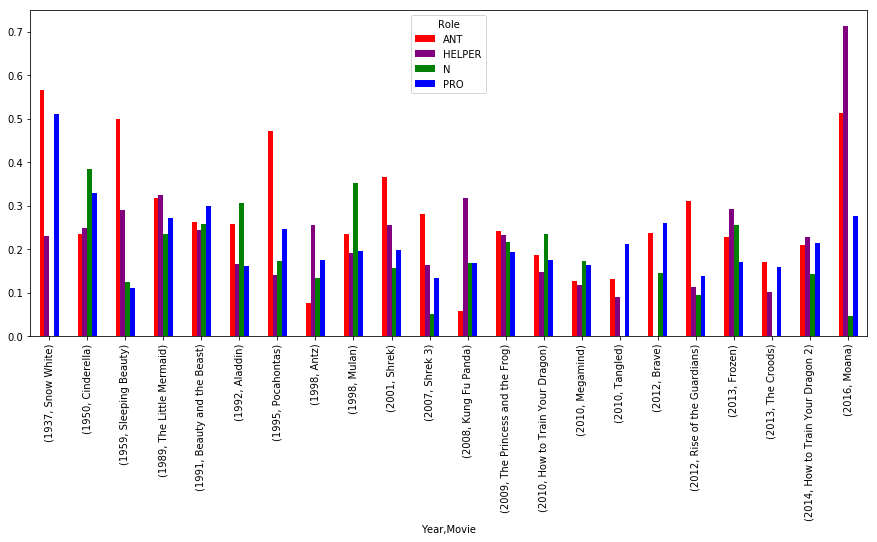

In [107]:
##commands vs modals based on role?
modal_by_role_all = movie_df.groupby(['Year','Movie','Role'])["Modal_Count"].describe()['mean']
modal_by_role_all.unstack().plot.bar(color = ['red', 'purple', 'green', 'blue'], figsize = (15,6))

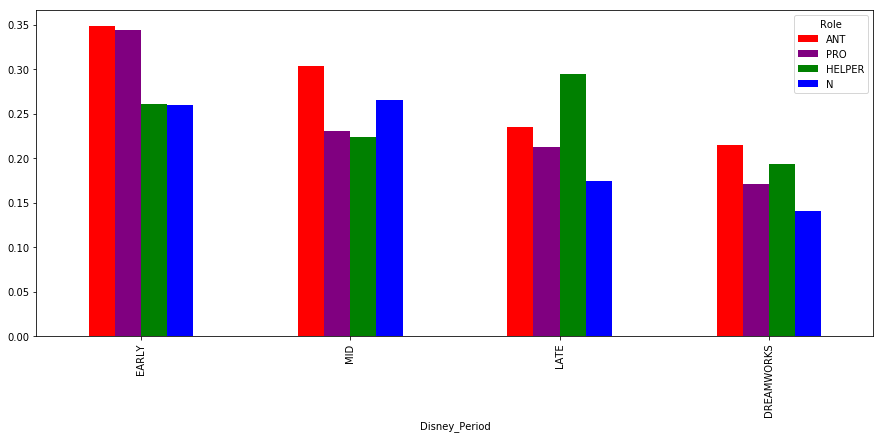

In [109]:
modal_by_role = movie_df.groupby(['Disney_Period','Role'], sort=False)["Modal_Count"].describe()['mean']
modal_by_role.unstack().plot.bar(color = ['red', 'purple', 'green', 'blue'], figsize = (15,6))

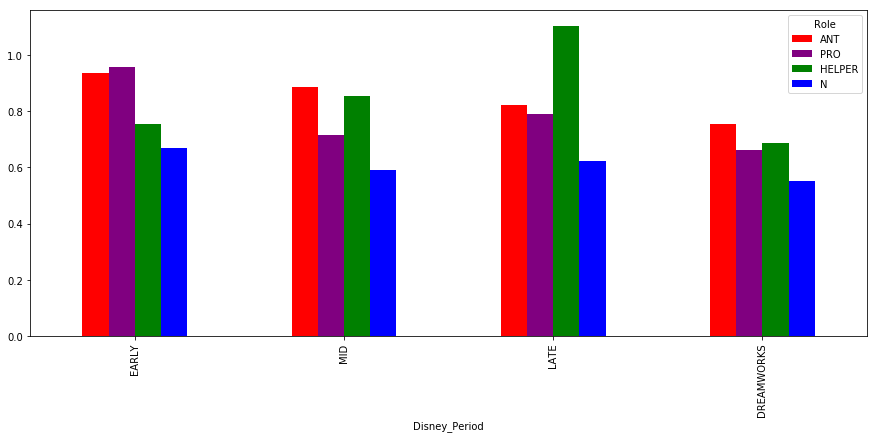

In [110]:
command_by_role = movie_df.groupby(['Disney_Period','Role'], sort=False)["Command_Count"].describe()['mean']
command_by_role.unstack().plot.bar(color = ['red', 'purple', 'green', 'blue'], figsize = (15,6))

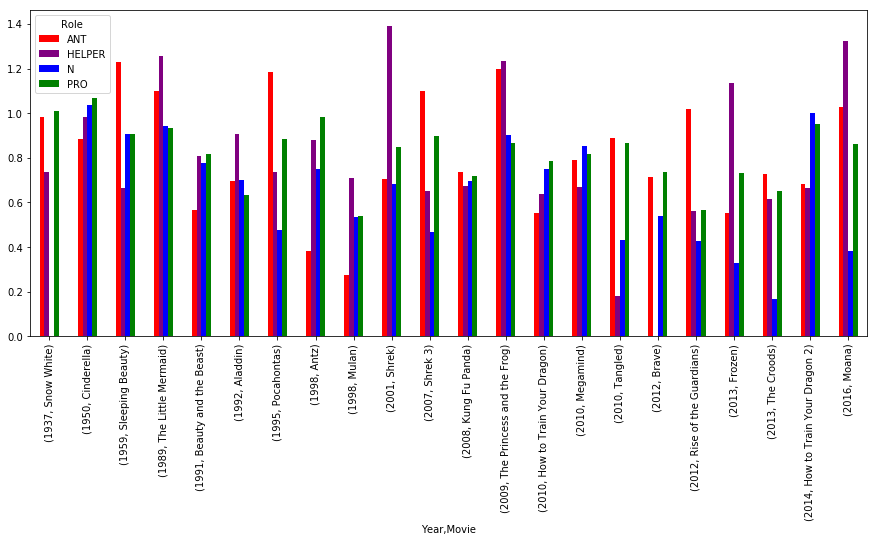

In [112]:
adv_by_role_all = movie_df.groupby(['Year','Movie','Role'])["Adv_Count"].describe()['mean']
adv_by_role_all.unstack().plot.bar(color = ['red','purple', 'blue', 'green'], figsize = (15,6))
#very hard to read...

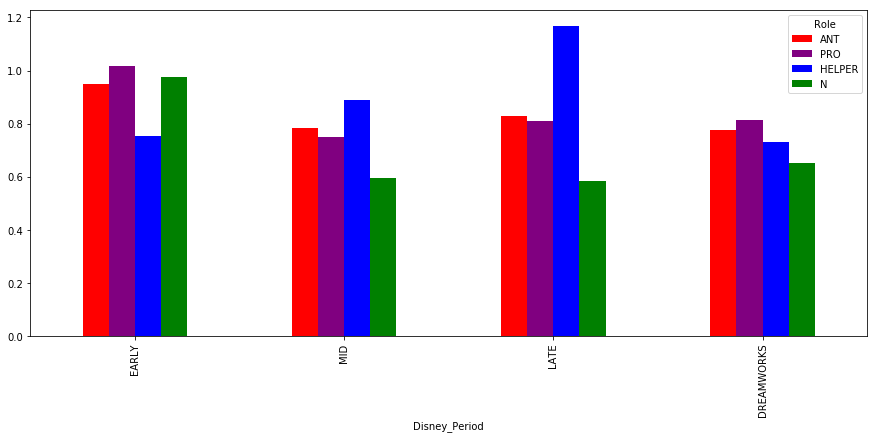

In [113]:
adv_by_role = movie_df.groupby(['Disney_Period','Role'], sort=False)["Adv_Count"].describe()['mean']
adv_by_role.unstack().plot.bar(color = ['red','purple', 'blue', 'green'], figsize = (15,6))

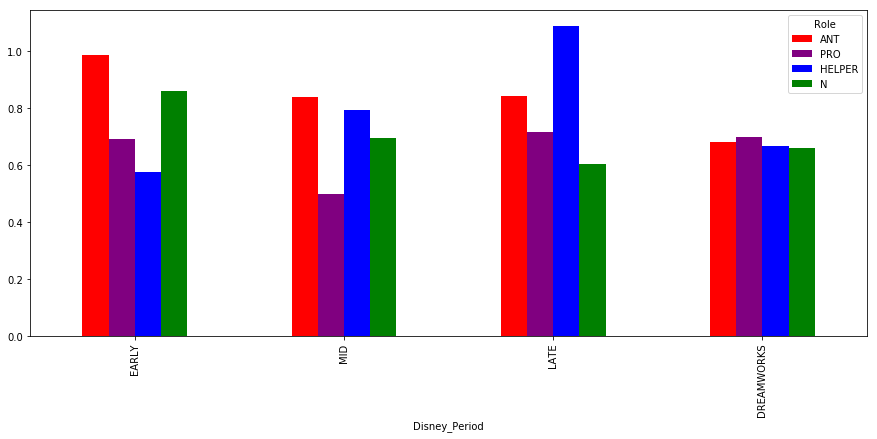

In [114]:
adj_by_role = movie_df.groupby(['Disney_Period','Role'], sort=False)["Adj_Count"].describe()['mean']
adj_by_role.unstack().plot.bar(color = ['red','purple', 'blue', 'green'], figsize = (15,6))

In [115]:
#pickle the 

,Disney_Period,Gender,Movie,Role,Song,Speaker,Speaker_Status,Text,UTTERANCE_NUMBER,Year,Tokens,Types,Token_Count,Type_Count,POS,Tag_Freq,Command_Count,Modal_Count,Adj_Count,Adv_Count
0,EARLY,f,Snow White,ANT,D,queen,NON-P,slave in the magic mirror come from the farthe...,1,1937,"[slave, in, the, magic, mirror, come, from, th...","{., !, slave, thy, face, from, me, the, and, c...",26,24,"[(slave, NN), (in, IN), (the, DT), (magic, JJ)...","{'NN': 9, 'IN': 3, 'DT': 2, 'JJ': 2, 'VBN': 1,...",2,0,3,0
1,EARLY,m,Snow White,ANT,D,mirror,NON-P,"what wouldst thou know, my queen ?",2,1937,"[what, wouldst, thou, know, ,, my, queen, ?]","{,, what, thou, queen, ?, wouldst, know, my}",8,8,"[(what, WP), (wouldst, VBZ), (thou, NN), (know...","{'WP': 1, 'VBZ': 1, 'NN': 3, ',': 1, 'PRP$': 1...",0,0,0,0
2,EARLY,f,Snow White,ANT,D,queen,NON-P,"magic mirror on the wall, who is the fairest o...",3,1937,"[magic, mirror, on, the, wall, ,, who, is, the...","{,, the, all, is, mirror, fairest, ?, on, one,...",14,13,"[(magic, JJ), (mirror, NN), (on, IN), (the, DT...","{'JJ': 1, 'NN': 2, 'IN': 2, 'DT': 3, ',': 1, '...",0,0,2,0
3,EARLY,m,Snow White,ANT,D,mirror,NON-P,"famed is thy beauty, majesty. but hold, a love...",4,1937,"[famed, is, thy, beauty, ,, majesty, ., but, h...","{., lovely, famed, maid, thy, her, than, ,, is...",33,27,"[(famed, VBN), (is, VBZ), (thy, JJ), (beauty, ...","{'VBN': 1, 'VBZ': 2, 'JJ': 3, 'NN': 7, ',': 3,...",1,1,3,3
4,EARLY,f,Snow White,ANT,D,queen,NON-P,alas for her ! reveal her name.,5,1937,"[alas, for, her, !, reveal, her, name, .]","{., name, !, alas, for, reveal, her}",8,7,"[(alas, NN), (for, IN), (her, PRP$), (!, .), (...","{'NN': 3, 'IN': 1, 'PRP$': 2, '.': 2}",0,0,0,0


## Interruption
How often are characters interrupted?

In [127]:
inter = []
for line in movie_df.Text:
    if line.endswith('-'):
        inter.append(line)

In [128]:
len(inter) #only 152 interruptions?

152

In [129]:
inter

["of course, i understand you have reason for concern. i will talk to the council. i'm sure we can--", 'i know! but if there are no fish in the lagoon--', "and there's a whole ocean--", 'we have one rule--', 'a rule that keeps us safe--', 'but dad i--', "but you still do. he's hard on you because--", 'please, please, settle down. we will dig new fields. we will find a way to--', 'you must! the ocean chose you. follow the fish hook--', 'gramma--', 'maui, shapeshifter, demigod of the wind and sea, i am moana of--', 'i am--', "what? no! i'm here to--", "what? no, no, no! i didn't…i wasn't…why would i ever say that? i mean--", 'i am moana of motunui. this is my canoe you will journey to--', 'i am moana of motunui--', 'come for this? the heart? you mean this heart right here?!--', "don't! you can't raise you voice like that--", 'come and get it!--', "sorry! i thought you were a monster! but, i found you hooks. and you're right, this tamatoa guy really likes his treasure--", "what? no. i'm t